In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [2]:
def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

## Distance Hamming 16

### Perfect mix

### 100000 individus

In [3]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation3"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation4"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation5"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming16/mutation6"

In [4]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0  1011  3858631       33    147  3859823
   Init      Run  Mesures  Close    Total
0   801  3838870       59     76  3839807
   Init      Run  Mesures  Close    Total
0   630  3562486       35    124  3563276
   Init     Run  Mesures  Close   Total
0   548  243599       82    126  244356


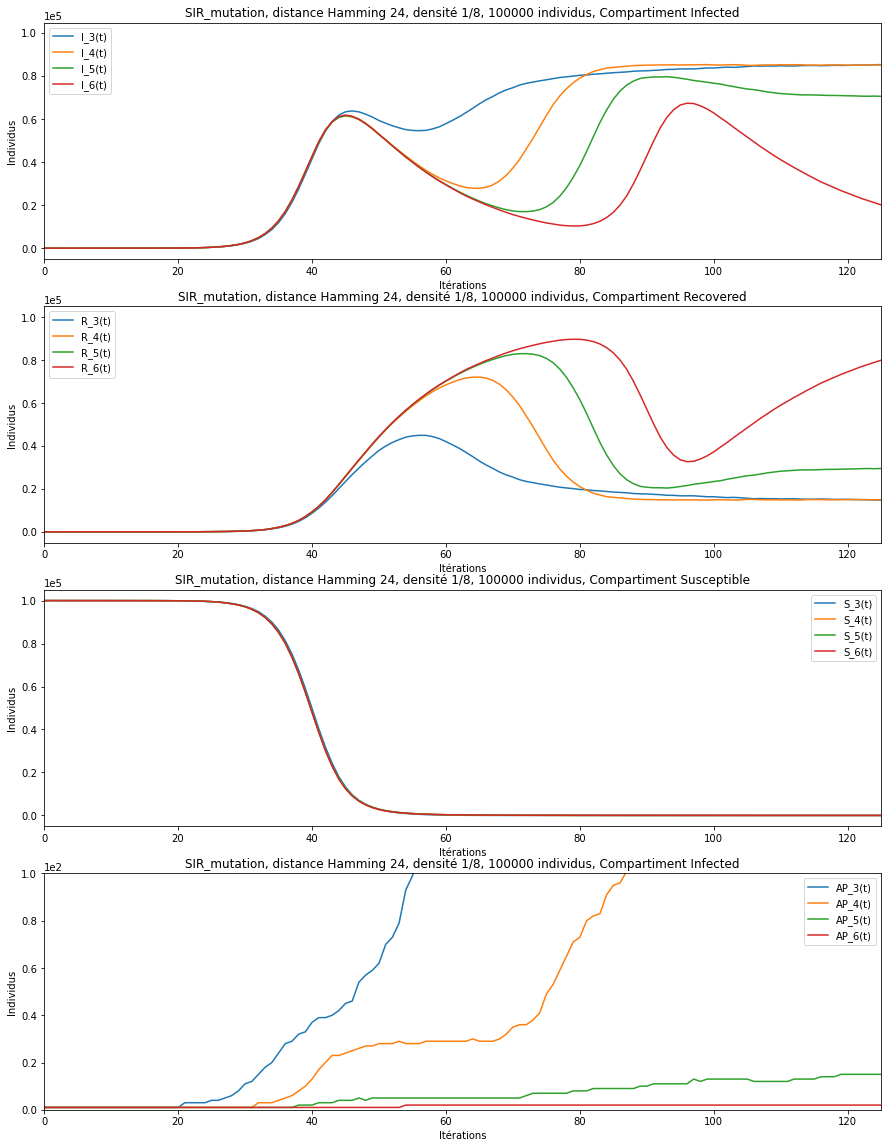

In [5]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

genome_AP1 = pd.read_csv(path1 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP2 = pd.read_csv(path2 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP3 = pd.read_csv(path3 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP4 = pd.read_csv(path4 + "/data_csv/m_nombre_AP.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 20))

# Infected
plt.subplot(4,1,1)
I_3, = plt.plot(contamine1, label='I_3(t)')
I_4, = plt.plot(contamine2, label='I_4(t)')
I_5, = plt.plot(contamine3, label='I_5(t)')
I_6, = plt.plot(contamine4, label='I_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_3, I_4, I_5, I_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(4,1,2)
R_3, = plt.plot(recovered1, label='R_3(t)')
R_4, = plt.plot(recovered2, label='R_4(t)')
R_5, = plt.plot(recovered3, label='R_5(t)')
R_6, = plt.plot(recovered4, label='R_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_3, R_4, R_5, R_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(4,1,3)
S_3, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_3(t)')
S_4, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_4(t)')
S_5, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_5(t)')
S_6, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_3, S_4, S_5, S_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Nombre AP différents
plt.subplot(4,1,4)
AP_3, = plt.plot(genome_AP1, label='AP_3(t)')
AP_4, = plt.plot(genome_AP2, label='AP_4(t)')
AP_5, = plt.plot(genome_AP3, label='AP_5(t)')
AP_6, = plt.plot(genome_AP4, label='AP_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[AP_3 ,AP_4 ,AP_5 ,AP_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])
plt.ylim([0,100])

plt.show()

## Distance Hamming 24

### Perfect mix

### 100000 individus

In [6]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation3"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation4"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation5"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Mutation/perfect_mix/distanceHamming24/mutation6"

In [7]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   291  3870235        3     90  3891700
   Init      Run  Mesures  Close    Total
0   345  3847363       27    108  3868578
   Init     Run  Mesures  Close   Total
0   328  140756        3     79  162791
   Init     Run  Mesures  Close   Total
0   319  152088       20     83  173957


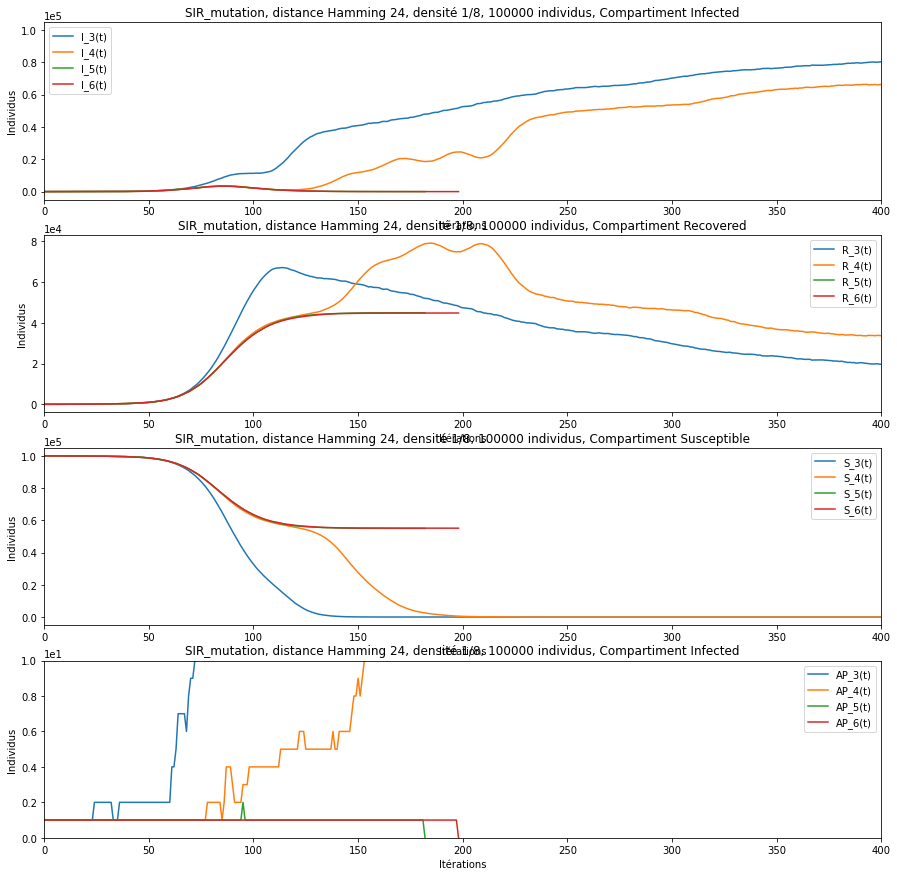

In [8]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

genome_AP1 = pd.read_csv(path1 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP2 = pd.read_csv(path2 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP3 = pd.read_csv(path3 + "/data_csv/m_nombre_AP.csv", dtype=int)
genome_AP4 = pd.read_csv(path4 + "/data_csv/m_nombre_AP.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 400

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(4,1,1)
I_3, = plt.plot(contamine1, label='I_3(t)')
I_4, = plt.plot(contamine2, label='I_4(t)')
I_5, = plt.plot(contamine3, label='I_5(t)')
I_6, = plt.plot(contamine4, label='I_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_3, I_4, I_5, I_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(4,1,2)
R_3, = plt.plot(recovered1, label='R_3(t)')
R_4, = plt.plot(recovered2, label='R_4(t)')
R_5, = plt.plot(recovered3, label='R_5(t)')
R_6, = plt.plot(recovered4, label='R_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_3, R_4, R_5, R_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(4,1,3)
S_3, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_3(t)')
S_4, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_4(t)')
S_5, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_5(t)')
S_6, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_3, S_4, S_5, S_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Nombre AP différents
plt.subplot(4,1,4)
AP_3, = plt.plot(genome_AP1, label='AP_3(t)')
AP_4, = plt.plot(genome_AP2, label='AP_4(t)')
AP_5, = plt.plot(genome_AP3, label='AP_5(t)')
AP_6, = plt.plot(genome_AP4, label='AP_6(t)')

plt.title("SIR_mutation, distance Hamming 24, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[AP_3 ,AP_4 ,AP_5 ,AP_6])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])
plt.ylim([0,10])

plt.show()